In [1]:
import pandas as pd
import os

In [2]:
df_sales_apr= pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files= [file for file in os.listdir("./Sales_Data")]
df_f= pd.DataFrame()

for file in files:
    df1= pd.read_csv("./Sales_Data/"+file)
    df_f= pd.concat([df_f, df1])

    
df_f

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:

df_f= df_f.dropna(how= 'all')
df_f[df_f["Quantity Ordered"].isna()]
df_f

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
df_f['Quantity Ordered']= df_f['Quantity Ordered'].astype(int)
df_f['Price Each']= df_f['Price Each'].astype(float)

df_f["Sale Price"]= df_f["Quantity Ordered"] * df_f["Price Each"]
df_f

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [5]:

df_f= df_f[df_f['Order Date'].str[0:2]!='Or']

In [6]:
import pandas as pd
pd.options.mode.chained_assignment = None 

df_f['Month_Of_Sale']= df_f["Order Date"].str.extract(r'(^[0-9]{2})')

df_by_mon= df_f.groupby("Month_Of_Sale", as_index=False)["Order ID"].count()

df_by_mon['Order ID']= df_by_mon['Order ID'].astype('int32')
df_by_mon.rename(columns= {"Order ID": "No of Sales"}, inplace=True)
df_by_mon

,Month_Of_Sale,No of Sales
0,01,9709
1,02,11975
2,03,15153
3,04,18279
4,05,16566
5,06,13554
6,07,14293
7,08,11961
8,09,11621
9,10,20282


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [12]:
df_salesmon= df_f.groupby("Month_Of_Sale", as_index= False)['Sale Price'].sum()
df_salesmon['Sale Price']= df_salesmon['Sale Price'].astype('int64')
df_salesmon


,Month_Of_Sale,Sale Price
0,01,1822256
1,02,2202022
2,03,2807100
3,04,3390670
4,05,3152606
5,06,2577802
6,07,2647775
7,08,2244467
8,09,2097560
9,10,3736726


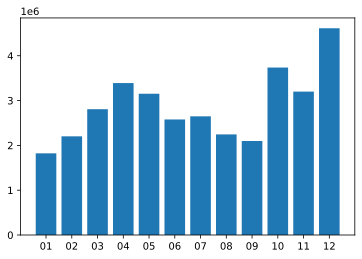

In [13]:


plt.bar(df_salesmon['Month_Of_Sale'], df_salesmon['Sale Price'])
plt.show();

C:\Users\smurk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


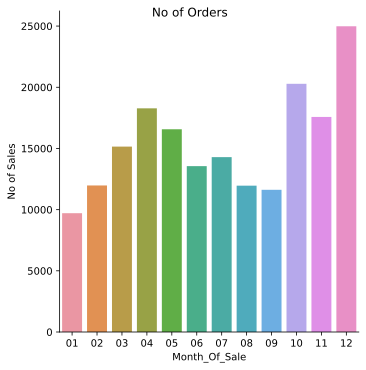

In [14]:

orders= sns.catplot("Month_Of_Sale", "No of Sales", kind= 'bar', data= df_by_mon)
orders.fig.suptitle("No of Orders")
plt.show();

In [15]:
df_f["Sale Price"]

0         23.90
2         99.99
3        600.00
4         11.99
5         11.99
          ...  
11681      8.97
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Sale Price, Length: 185950, dtype: float64

In [16]:
df_f["Purchase City"]= df_f["Purchase Address"].str.extract(r',([A-Za-z, ' ']+),')
df_f["Purchase City"].str.replace(' ', '')
def getstate(address):
    return address.split(',')[2].split(' ')[1]
df_f['State']= df_f['Purchase Address'].apply(lambda x: getstate(x))
df_f['Purchase City']= df_f['Purchase City']+"-"+df_f['State']
df_f

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale Price,Month_Of_Sale,Purchase City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04,Dallas-TX,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston-MA,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles-CA,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles-CA,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles-CA,CA
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09,Los Angeles-CA,CA
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09,San Francisco-CA,CA
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09,San Francisco-CA,CA
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09,San Francisco-CA,CA


In [17]:
df_bycity= df_f.groupby(df_f['Purchase City'], as_index=False)["Sale Price"].sum()
df_bycity['Sale Price']= df_bycity["Sale Price"].astype('float64')
df_bycity
df_bycity

,Purchase City,Sale Price
0,Atlanta-GA,2.795499e+06
1,Austin-TX,1.819582e+06
2,Boston-MA,3.661642e+06
3,Dallas-TX,2.767975e+06
4,Los Angeles-CA,5.452571e+06
5,New York City-NY,4.664317e+06
6,Portland-ME,4.497583e+05
7,Portland-OR,1.870732e+06
8,San Francisco-CA,8.262204e+06
9,Seattle-WA,2.747755e+06


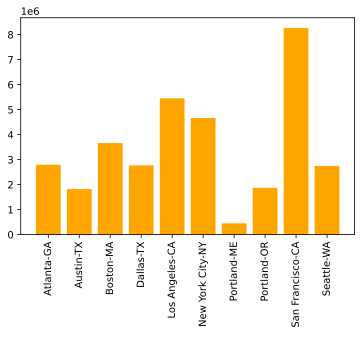

In [21]:
plt.bar(df_bycity["Purchase City"], df_bycity['Sale Price'], color= 'orange', )
plt.xticks(df_bycity['Purchase City'], rotation='vertical')
plt.show();

C:\Users\smurk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


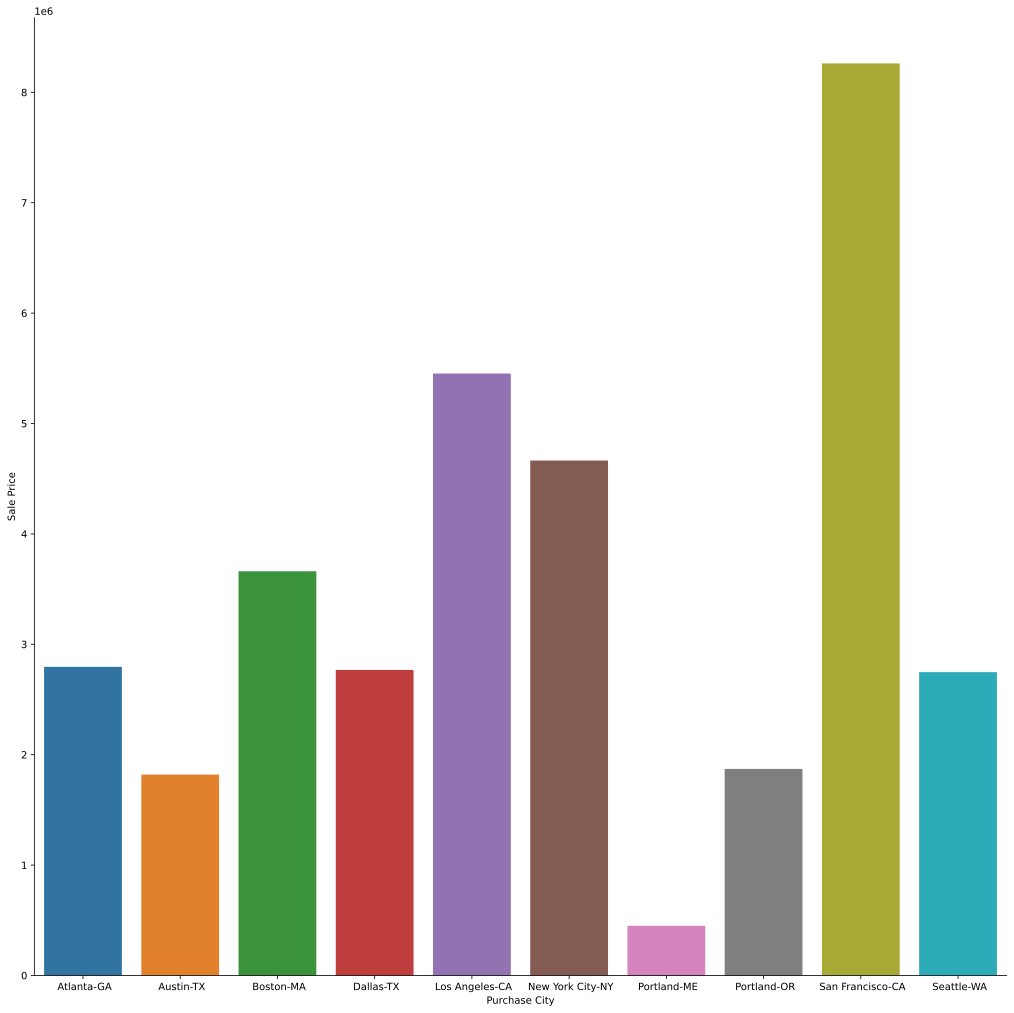

In [22]:
sns.catplot(df_bycity['Purchase City'], df_bycity['Sale Price'], data= df_bycity, kind='bar', height=14)

In [18]:
df_orders

NameError: name 'df_orders' is not defined

In [23]:
df_orders= df_f[df_f['Order ID'].duplicated(keep=False)]
df_orders['combined']= df_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale Price,Month_Of_Sale,Purchase City,State,combined
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles-CA,CA,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles-CA,CA,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles-CA,CA,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles-CA,CA,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,04,Boston-MA,MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,09,Atlanta-GA,GA,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta-GA,GA,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,09,Atlanta-GA,GA,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,09,San Francisco-CA,CA,"Google Phone,USB-C Charging Cable"


In [20]:
prod= list(df_orders["Product"].unique())
def returnind(x):
    return prod.index(x)
        
df_orders["Product ID"]= df_orders["Product"].apply(lambda x: returnind(x))
df_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale Price,Month_Of_Sale,Purchase City,State,Product ID
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles-CA,CA,0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles-CA,CA,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,04,Los Angeles-CA,CA,0
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,04,Los Angeles-CA,CA,2
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,04,Boston-MA,MA,3
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,09,Atlanta-GA,GA,13
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,09,Atlanta-GA,GA,1
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,09,Atlanta-GA,GA,4
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,09,San Francisco-CA,CA,0
